In [79]:
import spacy
import json
import en_core_web_sm
import pandas as pd
import numpy as np
import matplotlib
import statistics
from pathlib import Path
from collections import Counter
from matplotlib import pyplot as plt
from matplotlib import ticker as mticker
from os import path
%matplotlib inline

# Data loading and preparation

In [80]:
output_directory = "../milestone/images/"

In [81]:
with open("../src/data/data_2021-02-01_22-27-13.862993.json") as f:
    data = json.load(f)
df_data = pd.json_normalize(data['papers'])
df_data_copy = pd.json_normalize(data['papers'])

In [82]:
print("no. of scraped research papers is {}".format(len(df_data)))

no. of scraped research papers is 2230


In [83]:
no_keywords = [len(keyword) for keyword in df_data['keywords']]

print("the average no. of keywords per research paper is {}".format(statistics.mean(no_keywords)))

the average no. of keywords per research paper is 4.7040358744394615


# Visualization

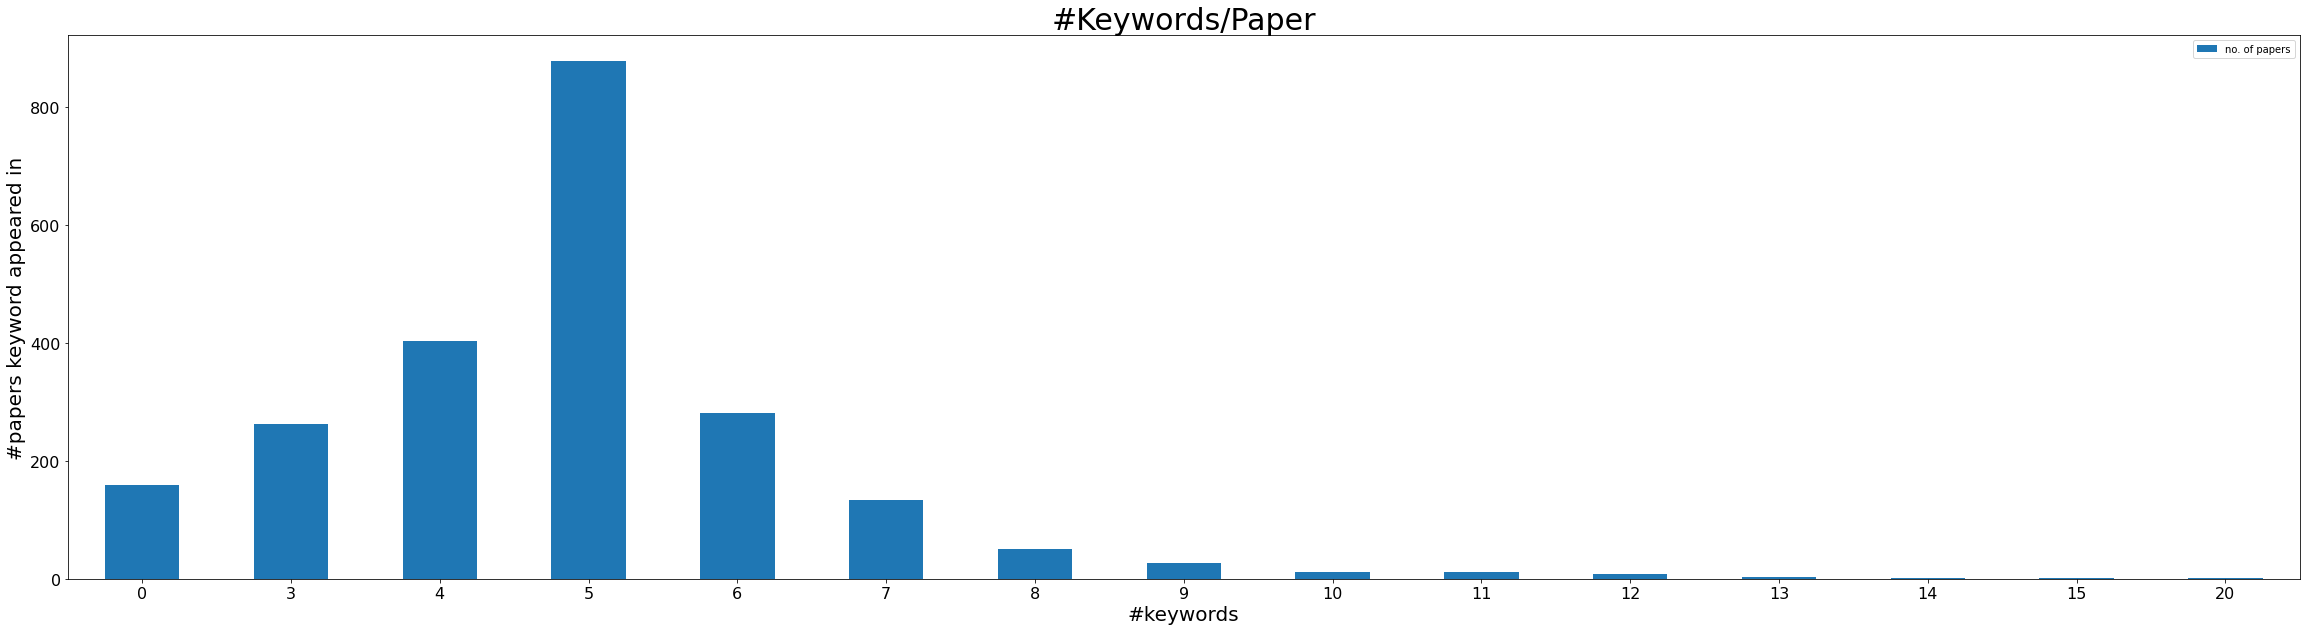

In [84]:
x = list(set(no_keywords))
_ = [no_keywords.count(tmp) for tmp in x]
df = pd.DataFrame({'no. of keywords': x, 'no. of papers':_})
no_kws_plot = df.plot.bar(x='no. of keywords', y='no. of papers', rot=0, fontsize= 16, figsize=(40, 10))
no_kws_plot.set_xlabel("#keywords", fontsize= 20)
no_kws_plot.set_ylabel("#papers keyword appeared in", fontsize= 20)
no_kws_plot.set_title("#Keywords/Paper", fontsize=30)
plt.savefig(Path(output_directory + 'keywords.png'))

In [85]:
mask = [n == 0 for n in no_keywords]
no_of_papers_without_keywords = len(df_data['keywords'][mask])
print("{} papers have no keywords".format(no_of_papers_without_keywords))

159 papers have no keywords


In [86]:
no_words = []

for abstract in df_data['abstract']:
    if isinstance(abstract, float):
        no_words.append(0)
    else:
        no_words.append(len(abstract[0].split(" ")))
    

In [87]:
print("{} papers have no abstract".format(len(no_words) - np.count_nonzero(no_words)))

20 papers have no abstract


In [88]:
c_abs = Counter()
c_abs.update(no_words)
print(len(c))

284


Text(0.5, 1.0, '#Words/Abstract')

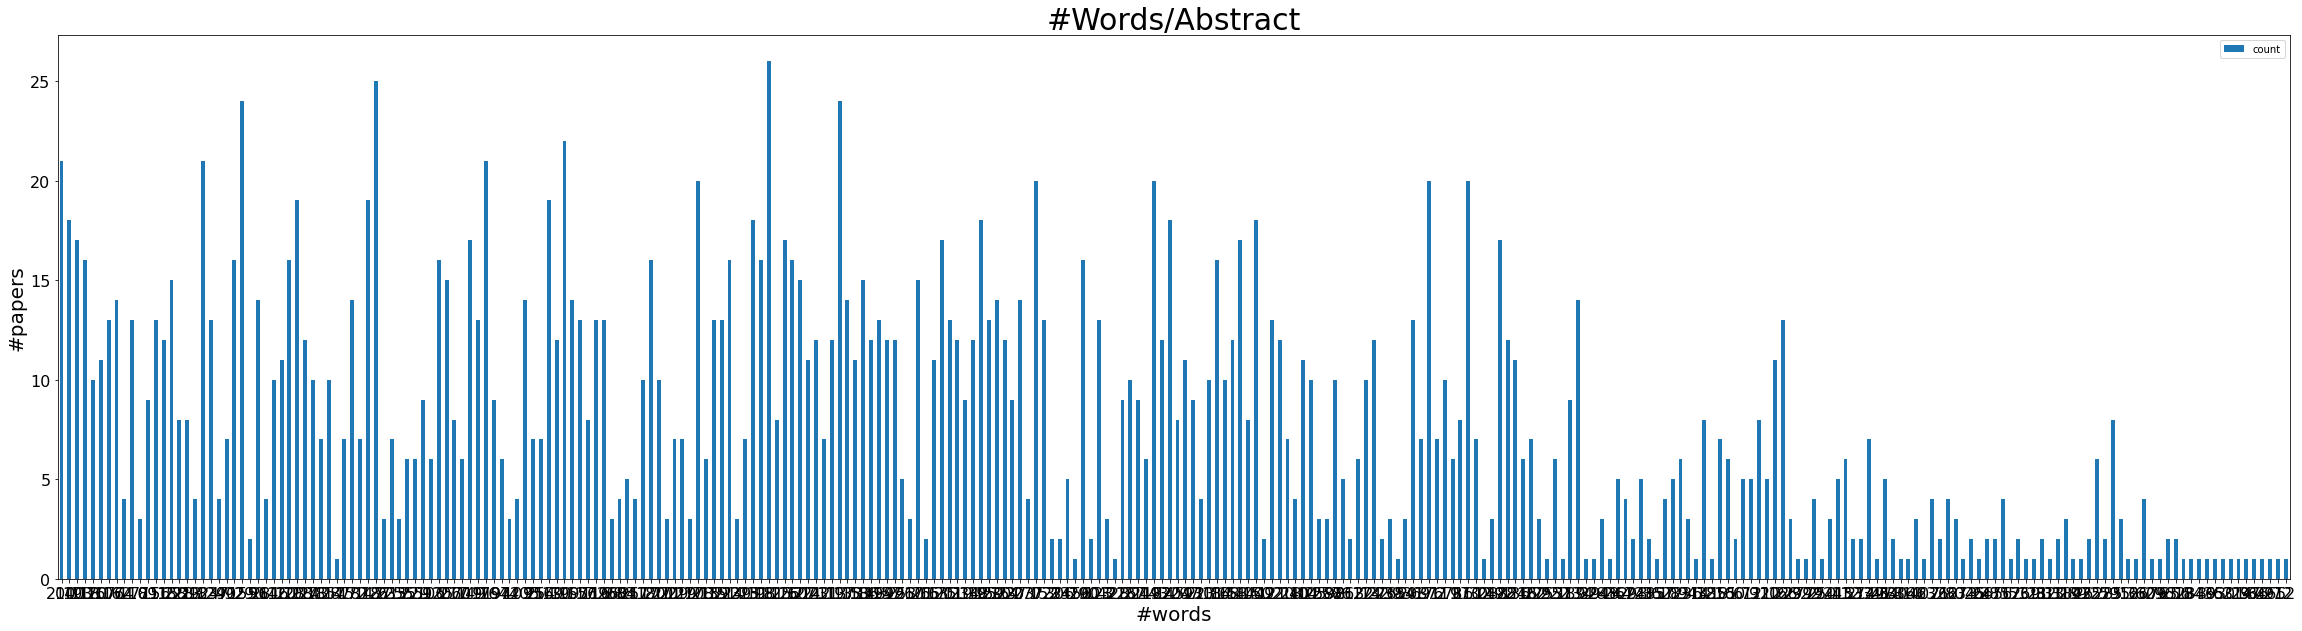

In [89]:
c_abs = Counter()
c_abs.update(no_words)

df_c_abs = pd.DataFrame.from_dict(c_abs, orient='index').reset_index()
df_c_abs = df_c_abs.rename(columns={'index':'no_words', 0:'count'})

plt = df_c_abs.plot.bar(x='no_words', y='count', rot=0, fontsize= 16, figsize= (40, 10))
plt.set_xlabel("#words", fontsize= 20)
plt.set_ylabel("#papers", fontsize= 20)
plt.set_title("#Words/Abstract", fontsize=30)
# Why is this not working?
#axes.set_xticks(np.arange(start=min(no_words), stop=max(no_words), step=10))
#axes.set_xticklabels(np.arange(start=min(no_words), stop=max(no_words), step=10))

In [90]:
df_data.dropna(subset=['keywords'], inplace=True)

nlp = en_core_web_sm.load(disable = ['ner', 'tagger', 'parser'])

stopwords = nlp.Defaults.stop_words

def preprocess_text(text):
    filtered = [token.lower() for token in text]
    filtered = [token for token in filtered if len(token) > 1 and token not in stopwords]
    return filtered

df_data['keywords'] = df_data['keywords'].apply(preprocess_text)

In [91]:
counter = Counter()
df_data['keywords'].apply(counter.update)
print(counter.most_common(20))

[('classification', 108), ('reinforcement learning', 79), ('support vector machines', 70), ('online learning', 66), ('kernel methods', 59), ('model selection', 56), ('clustering', 55), ('sparsity', 52), ('convex optimization', 51), ('bayesian networks', 50), ('machine learning', 50), ('graphical models', 49), ('feature selection', 44), ('regularization', 44), ('deep learning', 43), ('active learning', 42), ('lasso', 41), ('unsupervised learning', 40), ('neural networks', 38), ('python', 36)]


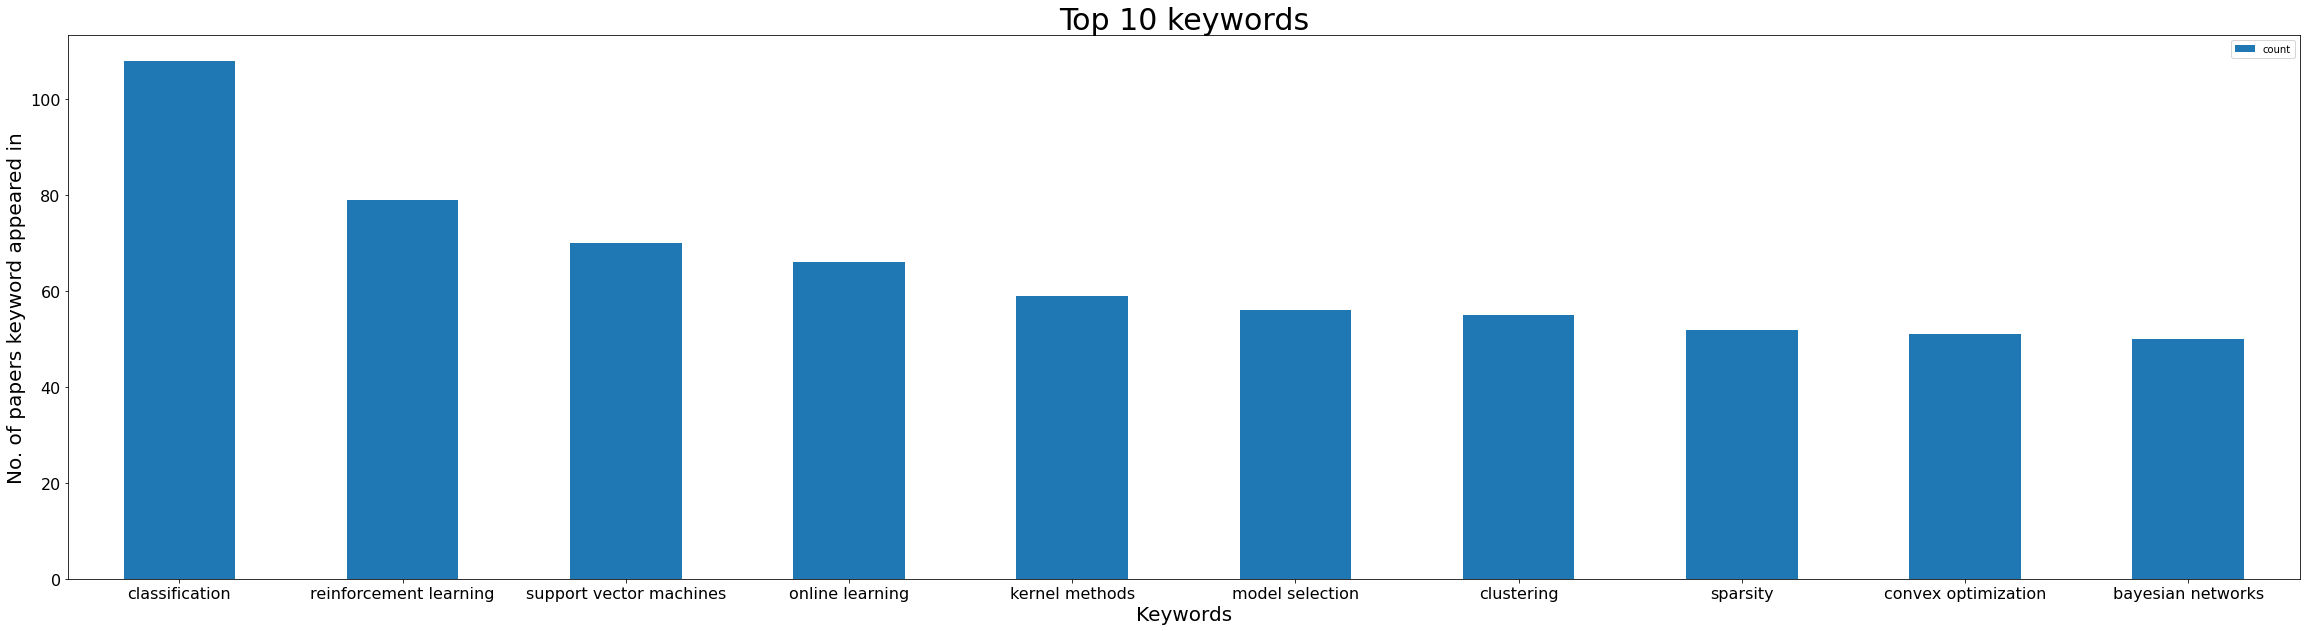

In [92]:
df_counter_words = pd.DataFrame.from_dict(counter, orient='index').reset_index()
df_counter_words = df_counter_words.rename(columns={'index':'word', 0:'count'})
top_words = df_counter_words.nlargest(10, "count")

top_plot = top_words.plot.bar(x='word', y='count', rot=0, fontsize= 16, figsize= (40, 10))
top_plot.set_xlabel("Keywords", fontsize= 20)
top_plot.set_ylabel("No. of papers keyword appeared in", fontsize= 20)
top_plot.set_title("Top 10 keywords", fontsize= 30)
top_plot.yaxis.set_major_formatter(mticker.ScalarFormatter())
top_plot.yaxis.get_major_formatter().set_scientific(False)
#top_plot.savefig(Path(output_directory + "top_keywords.png"))

In [93]:
df_data_copy.dropna(subset=['keywords'], inplace= True)
df_data_copy['keywords'] = df_data_copy['keywords'].apply(preprocess_text)

def count_no_keywords_per_document(text):
    return len(list(set(text).intersection(list(top_words["word"]))))
    
no_of_top_words_per_document = df_data_copy["keywords"].apply(count_no_keywords_per_document)

In [94]:
print("max no. of keywords from top 10 present in a single paper is {}".format(max(no_of_top_words_per_document)))
print("{} papers have 0 keywords from top 10".format(len(no_of_top_words_per_document[no_of_top_words_per_document == 0])))
print("{} papers have 1 keywords from top 10".format(len(no_of_top_words_per_document[no_of_top_words_per_document == 1])))
print("{} papers have 2 keywords from top 10".format(len(no_of_top_words_per_document[no_of_top_words_per_document == 2])))


max no. of keywords from top 10 present in a single paper is 3
1653 papers have 0 keywords from top 10
513 papers have 1 keywords from top 10
59 papers have 2 keywords from top 10


(-0.5, 399.5, 199.5, -0.5)

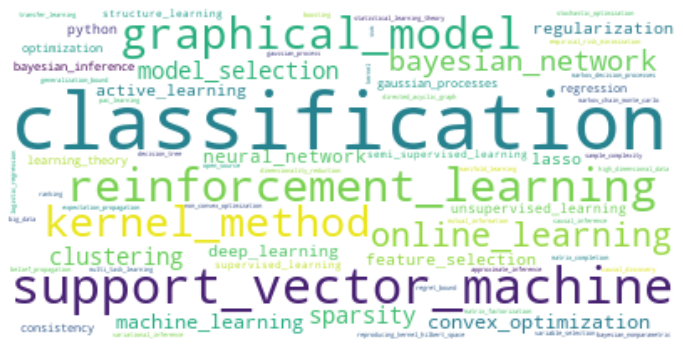

In [95]:
from wordcloud import WordCloud
from matplotlib import pyplot as plt

joined_text = " ".join([keyword.replace(' ', '_').replace('-', '_') for keywords in df_data['keywords'] for keyword in keywords])

wordcloud = WordCloud(max_font_size=60, max_words=150, background_color="white", collocations=False).generate(joined_text)

fig = plt.figure(1, figsize=(12, 12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
#plt.savefig(Path(output_directory + "top_keywords_wordcloud.png"))